## Using this notebook 

Here we will create a NDVI recovery time series (2000-2020) of both fires and create maps to show NDVI between APRIL and JUNE for Ramona, CA. Due to the region Ramona, CA is in, we will likely see one peak in April for shrubs and one peak in June for other evergreens. 

## Previous steps
- Load Ramona boundary --> Did this in the **notebooks\02_fire_perimeters\02_ramona_fire_perims.ipynb**
- Load Cedar & Witch perimeters --> Did this in the **notebooks\02_fire_perimeters\02_ramona_fire_perims.ipynb**
- Create inside & outside comparison areas --> Did this in the **notebooks\03_landcover\04_inside_vs_outside_comparison.ipynb**

## Current steps
### Step 0: Libraries
- Import required libraries

### Step 1: Load NDVI for April-June 2000-2020
- Load NDVI time series (e.g., April-June NDVI) for the insider & outside (0-4km) comparison areas
    - Reuse the gdfs we made for the **notebooks\03_landcover\04_inside_vs_outside_comparison.ipynb** but clip to the NDVI data instead of Shrub landcover data. 
    - Plot the maps for the CEDAR_YEARS and WITCH_YEARS

### Step 2: Compute mean NDVI 
- Calculate the mean NDVI for inside/outside each fire April-June 2000-2020

### Step 3: Plot NDVI trends and inside-outside differences
- Plot a timeseries of means for inside/outside each fire April-June 2000-2020
- Plot maps

The NDVI MODIS data used for this notebook is here: ramona-fire-recovery\data\raw\ndvi\Southern_CA_NDVI_2000_2020\MODIS_data
- There are only .tif files in the MODIS_data subfolder so we do not need to sort out the quality files. 

In [1]:
%store -r

In [2]:
print("Available variables:", [name for name in dir() if not name.startswith("_")])

Available variables: ['BOUNDARY_DIR', 'CEDAR_YEARS', 'DATA_DIR', 'FIG_DIR', 'In', 'LANDCOVER_DIR', 'LANDCOVER_FIG_DIR', 'NLCD_CLASSES', 'Out', 'PROJECT_ROOT', 'RCMAP_SHRUB_DIR', 'RCMAP_YEAR_FILES', 'RCMAP_ZIP_DIR', 'WITCH_YEARS', 'aitsn_zip', 'ann_ramona_climate_df', 'cedar_2003', 'cedar_3310', 'cedar_buffer_gdf', 'cedar_fire_gdf', 'cedar_ring_gdf', 'cedar_shrub_df', 'cedar_shrub_maps', 'ecoregion_gdf', 'exit', 'fires_gdf', 'gbif_gdf', 'get_ipython', 'ndvi_zip', 'occurrence_df', 'open', 'project_dir', 'quit', 'ramona_3310', 'ramona_buffer', 'ramona_buffer_union', 'ramona_cdp', 'target_crs', 'witch_2007', 'witch_3310', 'witch_buffer_gdf', 'witch_fire_gdf', 'witch_ring_gdf', 'witch_shrub_df']


### Step 0: Libraries

In [3]:
# Step 0: Import libraries

import os
from pathlib import Path
import geopandas as gpd
import rioxarray as rxr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Set folder parameters
NOTEBOOK_DIR = Path.cwd() #Override to where the current notebook exists
PROJECT_ROOT = NOTEBOOK_DIR.parents[1]
DATA_DIR = PROJECT_ROOT / 'data'
BOUNDARY_DIR = DATA_DIR / 'boundaries'
NDVI_DIR = DATA_DIR / 'raw' / 'ndvi'
FIG_DIR = Path(r"C:\Users\kayle\Desktop\earth-analytics\Final project\ramona-fire-recovery\figures\NDVI")
FIG_DIR.mkdir(parents=True, exist_ok=True)
MODIS_DIR = NDVI_DIR / "Southern_CA_NDVI_2000_2020" / "MODIS_data"
print("MODIS_DIR:", MODIS_DIR)
print("MODIS_DIR exists?", MODIS_DIR.exists())

MODIS_DIR: c:\Users\kayle\Desktop\earth-analytics\Final project\ramona-fire-recovery\data\raw\ndvi\Southern_CA_NDVI_2000_2020\MODIS_data
MODIS_DIR exists? True


### Check that our previous boundaries we need work

Text(17.423357638632822, 0.5, 'Northing (meters)')

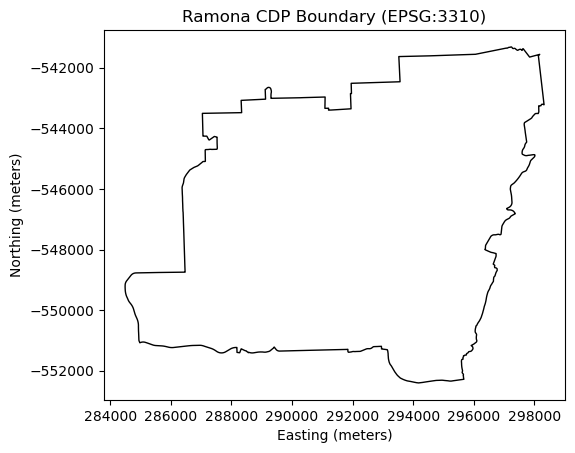

In [4]:
# Load ramona boundary 
# Use ramona_cdp

# Using ';' at the end of the ax.set_title ensures we just get the figure and we truncate the value of the last expression
ax = ramona_cdp.plot(edgecolor="black", facecolor="none", linewidth=1)
ax.set_title("Ramona CDP Boundary (EPSG:3310)");
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")

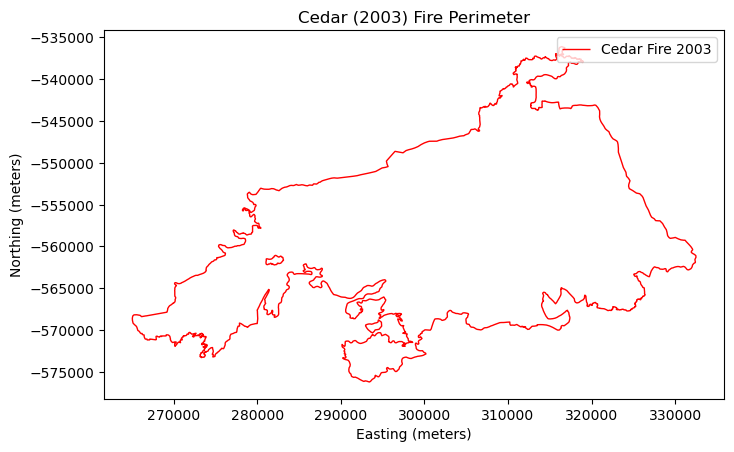

In [5]:
# Load only the cedar fire boundary 
# Use cedar_2003
fig, ax = plt.subplots(figsize=(8, 8))

cedar_2003.boundary.plot(
    ax=ax,
    edgecolor="red",
    linewidth=1,
    label="Cedar Fire 2003"
)

ax.set_title("Cedar (2003) Fire Perimeter")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend()

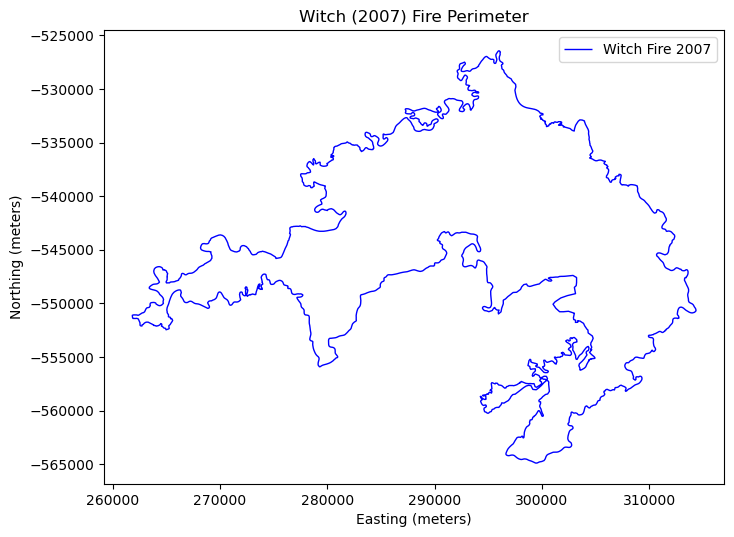

In [6]:
# Load only the witch fire boundary 
# use witch_2007
fig, ax = plt.subplots(figsize=(8, 8))

witch_2007.boundary.plot(
    ax=ax,
    edgecolor="blue",
    linewidth=1,
    label="Witch Fire 2007"
)

ax.set_title("Witch (2007) Fire Perimeter")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend()

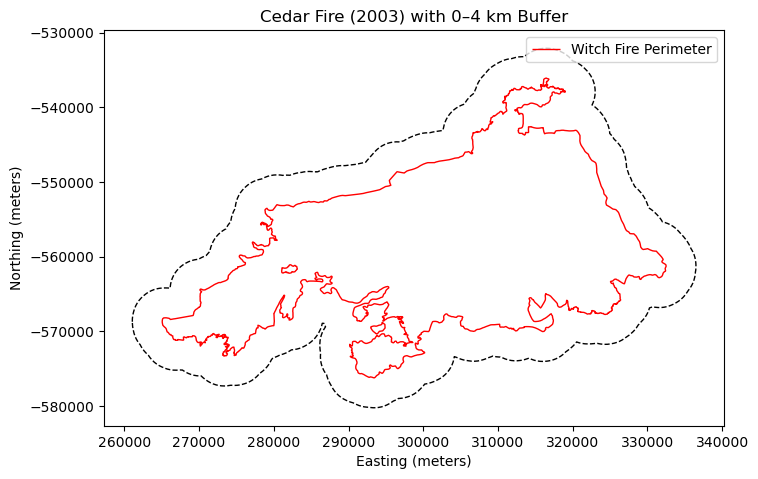

In [7]:
# Load the cedar + buffer boundary (inside v outside (0-4km))

fig, ax = plt.subplots(figsize=(8, 8))

# Plot Witch fire perimeter in yellow
cedar_fire_gdf.to_crs(target_crs).boundary.plot(
    ax=ax,
    color="red",
    linewidth=1,
    label="Witch Fire Perimeter"
)

# Plot buffer boundary in black dashed (optional second outline)
cedar_buffer_gdf.to_crs(target_crs).boundary.plot(
    ax=ax,
    color="black",
    linestyle="--",
    linewidth=1,
)

ax.set_title("Cedar Fire (2003) with 0–4 km Buffer")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend()

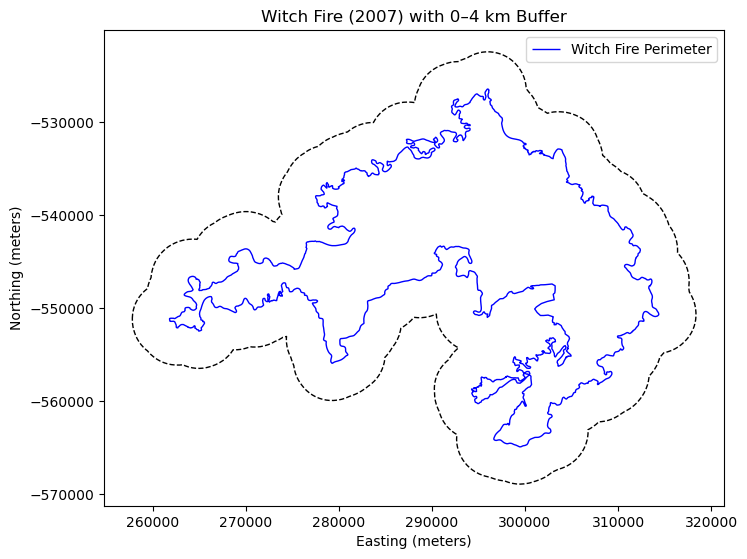

In [8]:
# Load the witch + buffer boundary (inside v outside (0-4km))

fig, ax = plt.subplots(figsize=(8, 8))

# Plot Witch fire perimeter in yellow
witch_fire_gdf.to_crs(target_crs).boundary.plot(
    ax=ax,
    color="blue",
    linewidth=1,
    label="Witch Fire Perimeter"
)

# Plot buffer boundary in black dashed (optional second outline)
witch_buffer_gdf.to_crs(target_crs).boundary.plot(
    ax=ax,
    color="black",
    linestyle="--",
    linewidth=1,
)

ax.set_title("Witch Fire (2007) with 0–4 km Buffer")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
ax.legend()

In [9]:
def make_inside_outside(fire_gdf, context_gdf=None, buffer_distance_m=5000):
    fire = fire_gdf.copy()
    fire['fire_id'] = 1
    fire = fire.dissolve(by='fire_id')

    fire_geom = fire.geometry.unary_union
    buffer_geom = fire_geom.buffer(buffer_distance_m)

    if context_gdf is not None:
        context_geom = context_gdf.geometry.unary_union
        buffer_geom = buffer_geom.intersection(context_geom)

    outside_geom = buffer_geom.difference(fire_geom)

    return (
        gpd.GeoDataFrame(geometry=[fire_geom], crs=fire_gdf.crs),
        gpd.GeoDataFrame(geometry=[outside_geom], crs=fire_gdf.crs),
    )

## Start current steps (Steps 1-3)

### Step 1: Load NDVI
Using the MODIS data we downloaded from AppEEARS we can now investigate whether the shrub cover is actually healthy or not during the peak greening months in Ramona, which lasts between April and June. 

In [10]:
# Step 1 Load NDVI
# NDVI path 
# The NDVI MODIS data used for this notebook is here: 
# data/raw/ndvi/Southern_CA_NDVI_2000_2020/MODIS_data

ndvi_files = sorted(MODIS_DIR.glob("*.tif"))
print(f"Found {len(ndvi_files)} NDVI rasters")
print("First few files:")
for f in ndvi_files[:5]:
    print("  ", f.name)

# ---- EDIT THIS FUNCTION TO MATCH YOUR FILENAME PATTERN IF YOU USE DIFFERENT MODIS DATA ----
### NOTE ### I already pulled only the .tif files so we don't need to do additional sorting/filtering
def parse_modis_filename(path: Path) -> datetime:
    """
    Reminder on how to parse MODIS NDVI filenames like:
    MOD13A1.061__500m_16_days_NDVI_doy2000049000000_aid0001.tif

    Pattern: ..._doyYYYYDDD000000_...
      - YYYY = year
      - DDD  = day of year (001–365)
    """
    name = path.stem  # strip .tif since everything is .tif
    parts = name.split("_")

    # Find the part that starts with "doy"
    # Here we are defining that doy is the start of the numeric string we want to convert to dates
    doy_part = [p for p in parts if p.startswith("doy")][0]
    code = doy_part.replace("doy", "")  # "2000049000000"

    # Here we are telling it that the year is the first 4 in the string and that day of year is the following 3 in the string
    year = int(code[:4])      # 2000
    doy = int(code[4:7])      # 049

    # Convert year + DOY to a real date
    date = datetime(year, 1, 1) + pd.Timedelta(days=doy - 1)
    return date

# ---- Build the index DataFrame ----
records = []
for fp in ndvi_files:
    dt = parse_modis_filename(fp)
    records.append({"path": fp, "date": dt})

ndvi_index = pd.DataFrame.from_records(records)

print("Columns in ndvi_index:", ndvi_index.columns.tolist())
print(ndvi_index.head())

# Sort by date and add year/month/day columns
ndvi_index = ndvi_index.sort_values("date").reset_index(drop=True)
ndvi_index["year"] = ndvi_index["date"].dt.year
ndvi_index["month"] = ndvi_index["date"].dt.month
ndvi_index["day"] = ndvi_index["date"].dt.day

ndvi_index.head()

Found 954 NDVI rasters
First few files:
   MOD13A1.061__500m_16_days_NDVI_doy2000049000000_aid0001.tif
   MOD13A1.061__500m_16_days_NDVI_doy2000065000000_aid0001.tif
   MOD13A1.061__500m_16_days_NDVI_doy2000081000000_aid0001.tif
   MOD13A1.061__500m_16_days_NDVI_doy2000097000000_aid0001.tif
   MOD13A1.061__500m_16_days_NDVI_doy2000113000000_aid0001.tif
Columns in ndvi_index: ['path', 'date']
                                                path       date
0  c:\Users\kayle\Desktop\earth-analytics\Final p... 2000-02-18
1  c:\Users\kayle\Desktop\earth-analytics\Final p... 2000-03-05
2  c:\Users\kayle\Desktop\earth-analytics\Final p... 2000-03-21
3  c:\Users\kayle\Desktop\earth-analytics\Final p... 2000-04-06
4  c:\Users\kayle\Desktop\earth-analytics\Final p... 2000-04-22


,path,date,year,month,day
0,c:\Users\kayle\Desktop\earth-analytics\Final p...,2000-02-18,2000,2,18
1,c:\Users\kayle\Desktop\earth-analytics\Final p...,2000-02-18,2000,2,18
2,c:\Users\kayle\Desktop\earth-analytics\Final p...,2000-03-05,2000,3,5
3,c:\Users\kayle\Desktop\earth-analytics\Final p...,2000-03-05,2000,3,5
4,c:\Users\kayle\Desktop\earth-analytics\Final p...,2000-03-21,2000,3,21


### Step 2: Compute the mean NDVI
To do this we are going to make 2 helpers, one that will clip one NDVI raster to a polygon & compute mean, and another to compute the yearly mean. We will use these to build our dataframes just like we did for the landcover change notebooks. We will have 4 dataframes (inside and outside) for both fires to summarize.

In [11]:
# Step 2 Compute mean NDVI 
# Calculate the mean NDVI for inside/outside each fire April-June 2000-2020

# Helper function first to clip one NDVI raster to a polygon & compute mean
def mean_ndvi_for_raster_in_zone(raster_path: Path, zone_gdf: gpd.GeoDataFrame) -> float:
    """
    Open a single MODIS NDVI raster (MOD13A1.061), reproject zone to raster CRS,
    clip, apply the MODIS scale factor (0.0001), and return mean NDVI for that zone.

    Returns np.nan if there is no overlap or all values are nodata.
    """
    # Open raster
    ndvi = rxr.open_rasterio(raster_path, masked=True).squeeze()

    # Reproject zone to raster CRS if needed
    zone = zone_gdf
    if zone.crs != ndvi.rio.crs:
        zone = zone.to_crs(ndvi.rio.crs)

    # Clip to zone
    try:
        clipped = ndvi.rio.clip(zone.geometry, zone.crs, drop=True)
    except Exception:
        # No overlap or clipping error
        return np.nan

    if clipped.size == 0:
        return np.nan

    # Convert to float
    arr = clipped.astype("float32")

    # Handle nodata:
    # MOD13A1 NDVI nodata is typically -3000, and valid range is -2000..10000
    nodata_val = ndvi.rio.nodata
    if nodata_val is not None:
        arr = arr.where(arr != nodata_val)
    # Also mask clearly invalid values just in case
    arr = arr.where(arr > -2000)

    # Apply MOD13A1 scale factor: 0.0001
    arr = arr * 0.0001

    val = float(arr.mean().item())
    if np.isnan(val):
        return np.nan
    return val


In [ ]:
# Helper for yearly mean
def compute_yearly_mean_ndvi(
    ndvi_index: pd.DataFrame,
    zone_gdf: gpd.GeoDataFrame,
    years=range(2000, 2021),
    months=(4, 5, 6),
    fire_name="Cedar",
    zone_name="inside",
):
    records = []

    for year in years:
        subset = ndvi_index[
            (ndvi_index["year"] == year)
            & (ndvi_index["month"].isin(months))
        ]
        if subset.empty:
            continue

        vals = []
        for _, row in subset.iterrows():
            try:
                v = mean_ndvi_for_raster_in_zone(row["path"], zone_gdf)
                vals.append(v)
            except Exception as e:
                print(f"Skipping {row['path']} due to error: {e}")

        if len(vals) == 0:
            continue

        year_mean = float(np.nanmean(vals))
        records.append(
            {
                "year": year,
                "fire": fire_name,
                "zone": zone_name,
                "mean_ndvi": year_mean,
                "n_images": len(vals),
            }
        )

    return pd.DataFrame.from_records(records)

In [22]:
# Step 2 CONT 
# Run the helpers for Cedar and Witch, inside & outside
years_all = range(2000, 2021)

# Cedar fire
cedar_inside_df = compute_yearly_mean_ndvi(
    ndvi_index,
    cedar_fire_gdf,
    years=years_all,
    fire_name="Cedar",
    zone_name="inside",
)

cedar_outside_df = compute_yearly_mean_ndvi(
    ndvi_index,
    cedar_buffer_gdf,
    years=years_all,
    fire_name="Cedar",
    zone_name="outside",
)

# Witch fire
witch_inside_df = compute_yearly_mean_ndvi(
    ndvi_index,
    witch_fire_gdf,
    years=years_all,
    fire_name="Witch",
    zone_name="inside",
)

witch_outside_df = compute_yearly_mean_ndvi(
    ndvi_index,
    witch_buffer_gdf,
    years=years_all,
    fire_name="Witch",
    zone_name="outside",
)

# Combine all summaries into one tidy DataFrame
ndvi_summary = pd.concat(
    [cedar_inside_df, cedar_outside_df, witch_inside_df, witch_outside_df],
    ignore_index=True,
)

ndvi_summary.sort_values(["fire", "zone", "year"]).head(12)

,year,fire,zone,mean_ndvi,n_images
0,2000,Cedar,inside,0.365184,12
1,2001,Cedar,inside,0.378328,12
2,2002,Cedar,inside,0.326183,12
3,2003,Cedar,inside,0.374179,12
4,2004,Cedar,inside,0.275380,12
5,2005,Cedar,inside,0.346192,12
6,2006,Cedar,inside,0.342651,12
7,2007,Cedar,inside,0.313952,12
8,2008,Cedar,inside,0.319901,12
9,2009,Cedar,inside,0.329950,12


In [23]:
ndvi_summary.sort_values(["fire", "zone", "year"])

,year,fire,zone,mean_ndvi,n_images
0,2000,Cedar,inside,0.365184,12
1,2001,Cedar,inside,0.378328,12
2,2002,Cedar,inside,0.326183,12
3,2003,Cedar,inside,0.374179,12
4,2004,Cedar,inside,0.275380,12
...,...,...,...,...,...
79,2016,Witch,outside,0.340501,12
80,2017,Witch,outside,0.352629,12
81,2018,Witch,outside,0.324728,12
82,2019,Witch,outside,0.369850,12


### Step 3: Plot NDVI trends and inside-outside differences

In [18]:
# Step 3 Plot NDVI trends and inside-outside differences
# Plot a timeseries of means for inside/outside each fire April-June 2000-2020
# Plot map grids of means for inside/outside each fire April-June 2000-2020

# First make a helper function to plot per-fire timeseries
def plot_fire_ndvi_timeseries(
    summary_df: pd.DataFrame,
    fire_name: str,
    fire_year: int,
    fig_dir: Path = FIG_DIR,
):
    df_fire = summary_df[summary_df["fire"] == fire_name]

    pivot = df_fire.pivot(
        index="year",
        columns="zone",
        values="mean_ndvi",
    )

    fig, ax = plt.subplots(figsize=(8, 5))

    pivot.plot(ax=ax)
    ax.axvline(fire_year, linestyle="--", linewidth=1, label=f"{fire_name} fire year")

    ax.set_title(f"{fire_name} NDVI (April–June mean, 2000–2020)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mean NDVI (dimensionless)")
    ax.grid(True, alpha=0.3)
    ax.legend(title="Zone")

    out_path = fig_dir / f"{fire_name.lower()}_ndvi_timeseries_inside_vs_outside.png"
    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    print("Saved:", out_path)

Saved: C:\Users\kayle\Desktop\earth-analytics\Final project\ramona-fire-recovery\figures\NDVI\cedar_ndvi_timeseries_inside_vs_outside.png
Saved: C:\Users\kayle\Desktop\earth-analytics\Final project\ramona-fire-recovery\figures\NDVI\witch_ndvi_timeseries_inside_vs_outside.png


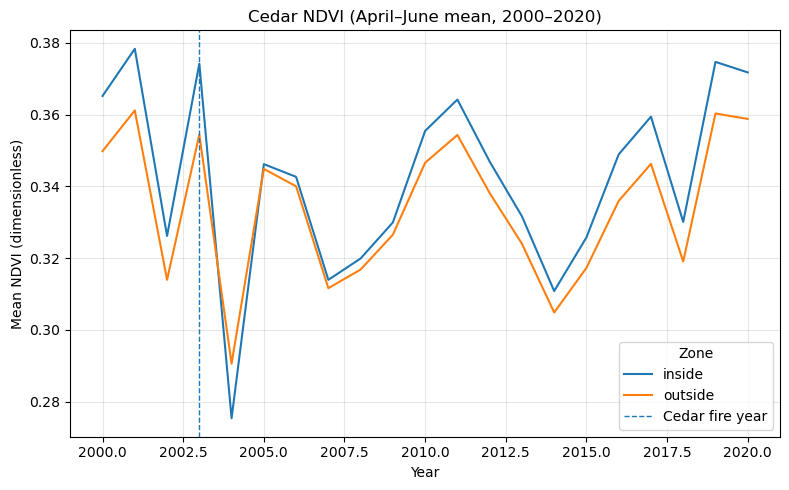

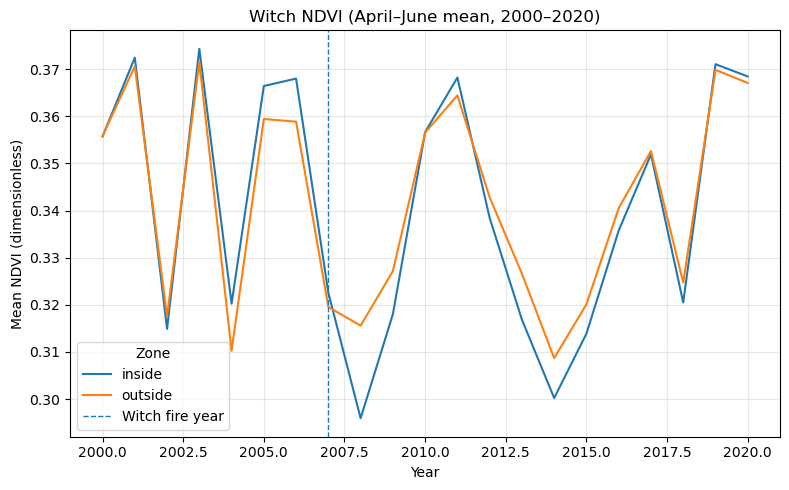

In [19]:
# Step 3 CONT
# Time series for Cedar and Witch
plot_fire_ndvi_timeseries(ndvi_summary, "Cedar", fire_year=2003)
plot_fire_ndvi_timeseries(ndvi_summary, "Witch", fire_year=2007)


### Step 3.1: Plot the NDVI spatial patterns

In [ ]:
# Step 3,1: NDVI spatial patterns (maps)

# Create a helper to load & clip NDVI for one year

def load_and_clip_ndvi_year(
    year: int,
    boundary_gdf: gpd.GeoDataFrame,
    months=(4, 5, 6),
):
    """
    Load a single MODIS NDVI composite for a given year, filter by months,
    clip to the given boundary (e.g., 0–4 km buffer), apply the MODIS scale
    factor (0.0001), and return:

      band      -> 2D numpy array of NDVI values (scaled to -1..1)
      transform -> affine transform
      meta      -> dict with 'crs'
    """
    subset = ndvi_index[
        (ndvi_index["year"] == year) & (ndvi_index["month"].isin(months))
    ].sort_values("date")

    if subset.empty:
        raise ValueError(f"No NDVI rasters found for year {year} and months {months}")

    row = subset.iloc[0]

    ndvi = rxr.open_rasterio(row["path"], masked=True).squeeze()

    # Reproject boundary to raster CRS if needed
    boundary = boundary_gdf
    if boundary.crs != ndvi.rio.crs:
        boundary = boundary.to_crs(ndvi.rio.crs)

    # Clip
    clipped = ndvi.rio.clip(boundary.geometry, boundary.crs, drop=True)

    # Convert to float
    arr = clipped.astype("float32")

    # Mask nodata / invalids
    nodata_val = ndvi.rio.nodata
    if nodata_val is not None:
        arr = arr.where(arr != nodata_val)
    arr = arr.where(arr > -2000)

    # Apply scale factor
    arr = arr * 0.0001

    band = arr.values
    transform = arr.rio.transform()
    meta = {"crs": arr.rio.crs}

    return band, transform, meta


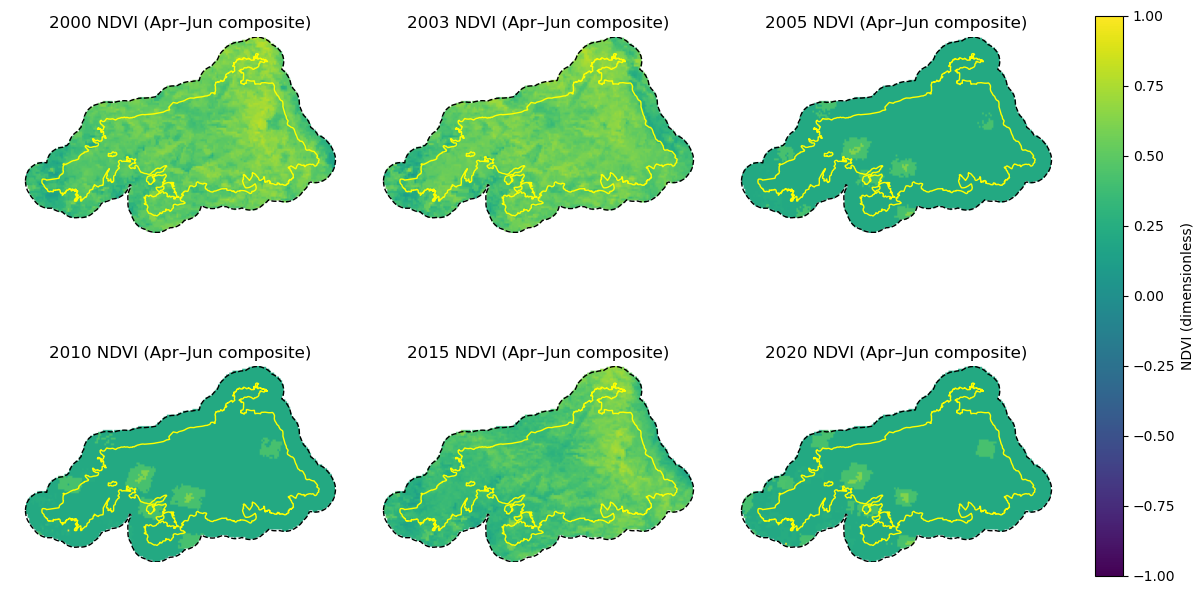

In [21]:
# Now map cedar NDVI maps with 0–4 km buffer
# ===========================================================
# Cedar Fire NDVI maps WITH 0–4 km buffer
# ===========================================================

cedar_years_to_plot = [2000, 2003, 2005, 2010, 2015, 2020]

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8))
axes_flat = axes.ravel()

for ax, year in zip(axes_flat, cedar_years_to_plot):
    band, transform, meta = load_and_clip_ndvi_year(
        year,
        cedar_buffer_gdf,   # buffer GDF, not the perimeter
        months=(4, 5, 6),   # same April–June window as the time series
    )

    nrows_band, ncols_band = band.shape
    left = transform.c
    top = transform.f
    right = left + transform.a * ncols_band
    bottom = top + transform.e * nrows_band

    # Colormap: NaNs (nodata) will be white
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color="white")

    im = ax.imshow(
        band,
        vmin=-1.0,   # NDVI typical range
        vmax=1.0,
        cmap=cmap,
        extent=(left, right, bottom, top),
        origin="upper",
    )

    # Plot Cedar perimeter in yellow
    cedar_fire_gdf.to_crs(meta["crs"]).boundary.plot(
        ax=ax,
        color="yellow",
        linewidth=1,
    )

    # Plot 0–4 km buffer boundary (dashed)
    cedar_buffer_gdf.to_crs(meta["crs"]).boundary.plot(
        ax=ax,
        color="black",
        linestyle="--",
        linewidth=1,
    )

    ax.set_title(f"{year} NDVI (Apr–Jun composite)")
    ax.set_axis_off()

# Hide any unused axes
for ax in axes_flat[len(cedar_years_to_plot):]:
    ax.set_visible(False)

fig.subplots_adjust(right=0.88, wspace=0.05, hspace=0.15)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("NDVI (dimensionless)")

plt.show()

fig.savefig(FIG_DIR / "cedar_ndvi_buffer_maps.png", dpi=300, bbox_inches="tight")


### NDVI and the Cedar Fire
Unlike our shrub cover maps which showed clear differences, here we see that the NDVI value for April-June changes a lot between our selected years. While shrub coverage helped us see where shrub is, these maps indicate tha the shrub is under similar duress both during and outside the fire event. Likely the shrub is responding to the drought conditions that plague Southern California. As a result, our NDVI data doesn't actually help us understand change pre and post fire, but issues with percipitation. We would need to also plot precip data which is beyond the scope of this project to see if the low NDVI years correlate with low rain fall (e.g. years 2005, 2010 and 2020). Also note that because the peak time for greening is April through June, our 2003 map does not show the effects of the fire. 

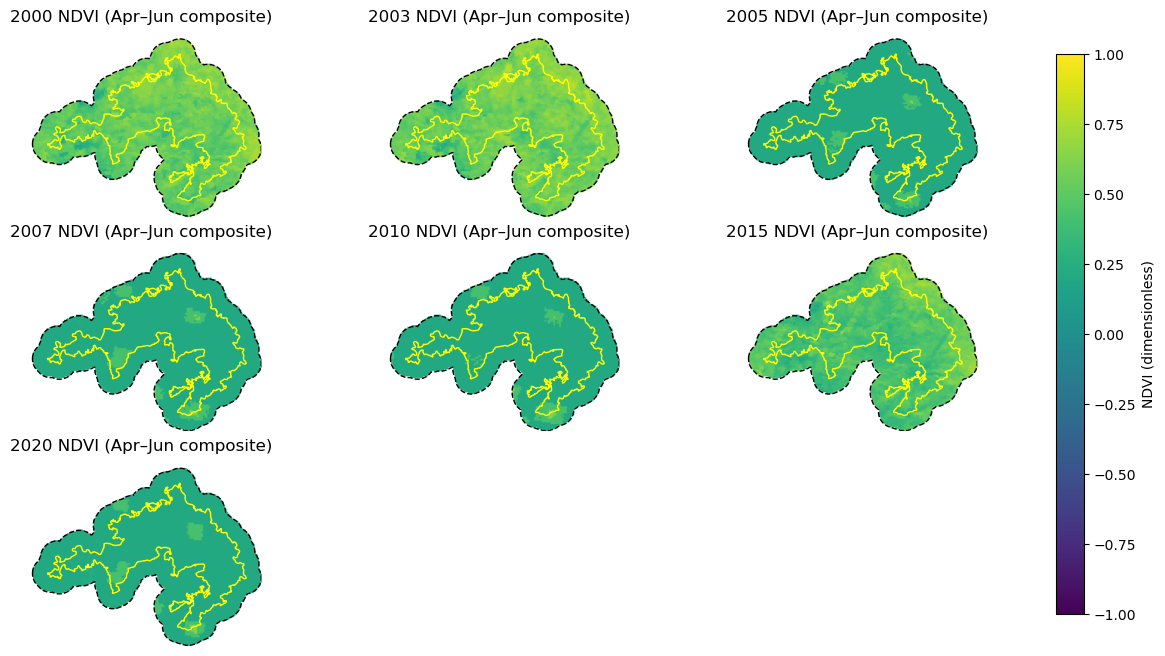

In [29]:
# Now map Witch NDVI maps with 0–4 km buffer
# ===========================================================
# Witch Fire NDVI maps WITH 0–4 km buffer
# ===========================================================

witch_years_to_plot = [2000, 2003, 2005, 2007, 2010, 2015, 2020]

nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 8))
axes_flat = axes.ravel()

for ax, year in zip(axes_flat, witch_years_to_plot):
    band, transform, meta = load_and_clip_ndvi_year(
        year,
        witch_buffer_gdf,   # buffer GDF, not the perimeter
        months=(4, 5, 6),   # same April–June window as the time series
    )

    nrows_band, ncols_band = band.shape
    left = transform.c
    top = transform.f
    right = left + transform.a * ncols_band
    bottom = top + transform.e * nrows_band

    # Colormap: NaNs (nodata) will be white
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color="white")

    im = ax.imshow(
        band,
        vmin=-1.0,   # NDVI typical range
        vmax=1.0,
        cmap=cmap,
        extent=(left, right, bottom, top),
        origin="upper",
    )

    # Plot Witch perimeter in yellow
    witch_fire_gdf.to_crs(meta["crs"]).boundary.plot(
        ax=ax,
        color="yellow",
        linewidth=1,
    )

    # Plot 0–4 km buffer boundary (dashed)
    witch_buffer_gdf.to_crs(meta["crs"]).boundary.plot(
        ax=ax,
        color="black",
        linestyle="--",
        linewidth=1,
    )

    ax.set_title(f"{year} NDVI (Apr–Jun composite)")
    ax.set_axis_off()

# Hide any unused axes
for ax in axes_flat[len(witch_years_to_plot):]:
    ax.set_visible(False)

fig.subplots_adjust(right=0.88, wspace=0.05, hspace=0.15)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("NDVI (dimensionless)")

plt.show()

fig.savefig(FIG_DIR / "witch_ndvi_buffer_maps.png", dpi=300, bbox_inches="tight")


### NDVI and the Witch Fire
Unlike our shrub cover maps which showed clear differences, here we see that the NDVI value for April-June changes a lot between our selected years. While shrub coverage helped us see where shrub is, these maps indicate that the shrub is under similar duress both during and outside the fire event. Likely the shrub is responding to the drought conditions that plague Southern California. As a result, our NDVI data doesn't actually help us understand change pre and post fire, but issues with percipitation. We would need to also plot precip data which is beyond the scope of this project to see if the low NDVI years correlate with low rain fall (e.g. years 2005, 2010 and 2020, 2015 and 2020). Unlike with the Cedar maps, in 2007 the shrub was already distressed prior to the Witch fire. Interestingly we see the same distrubance in 2005, 2010 and 2020. 

### Coming back to climate
We already know that Ramona has warmed significantly in the past 27 years. In order to tie this whole story together we would need to plot the precipitation with the climate trends we did early to assess how much the lower NDVI we see across the Cedar and Witch maps can reasonably be attributed to climate affects rather than the burn event itself.